In [15]:
from pdf2image import convert_from_path

In [23]:
pages = convert_from_path(r'docs\prescription\pre_2.pdf',poppler_path=r'C:\poppler-23.11.0\Library\bin')

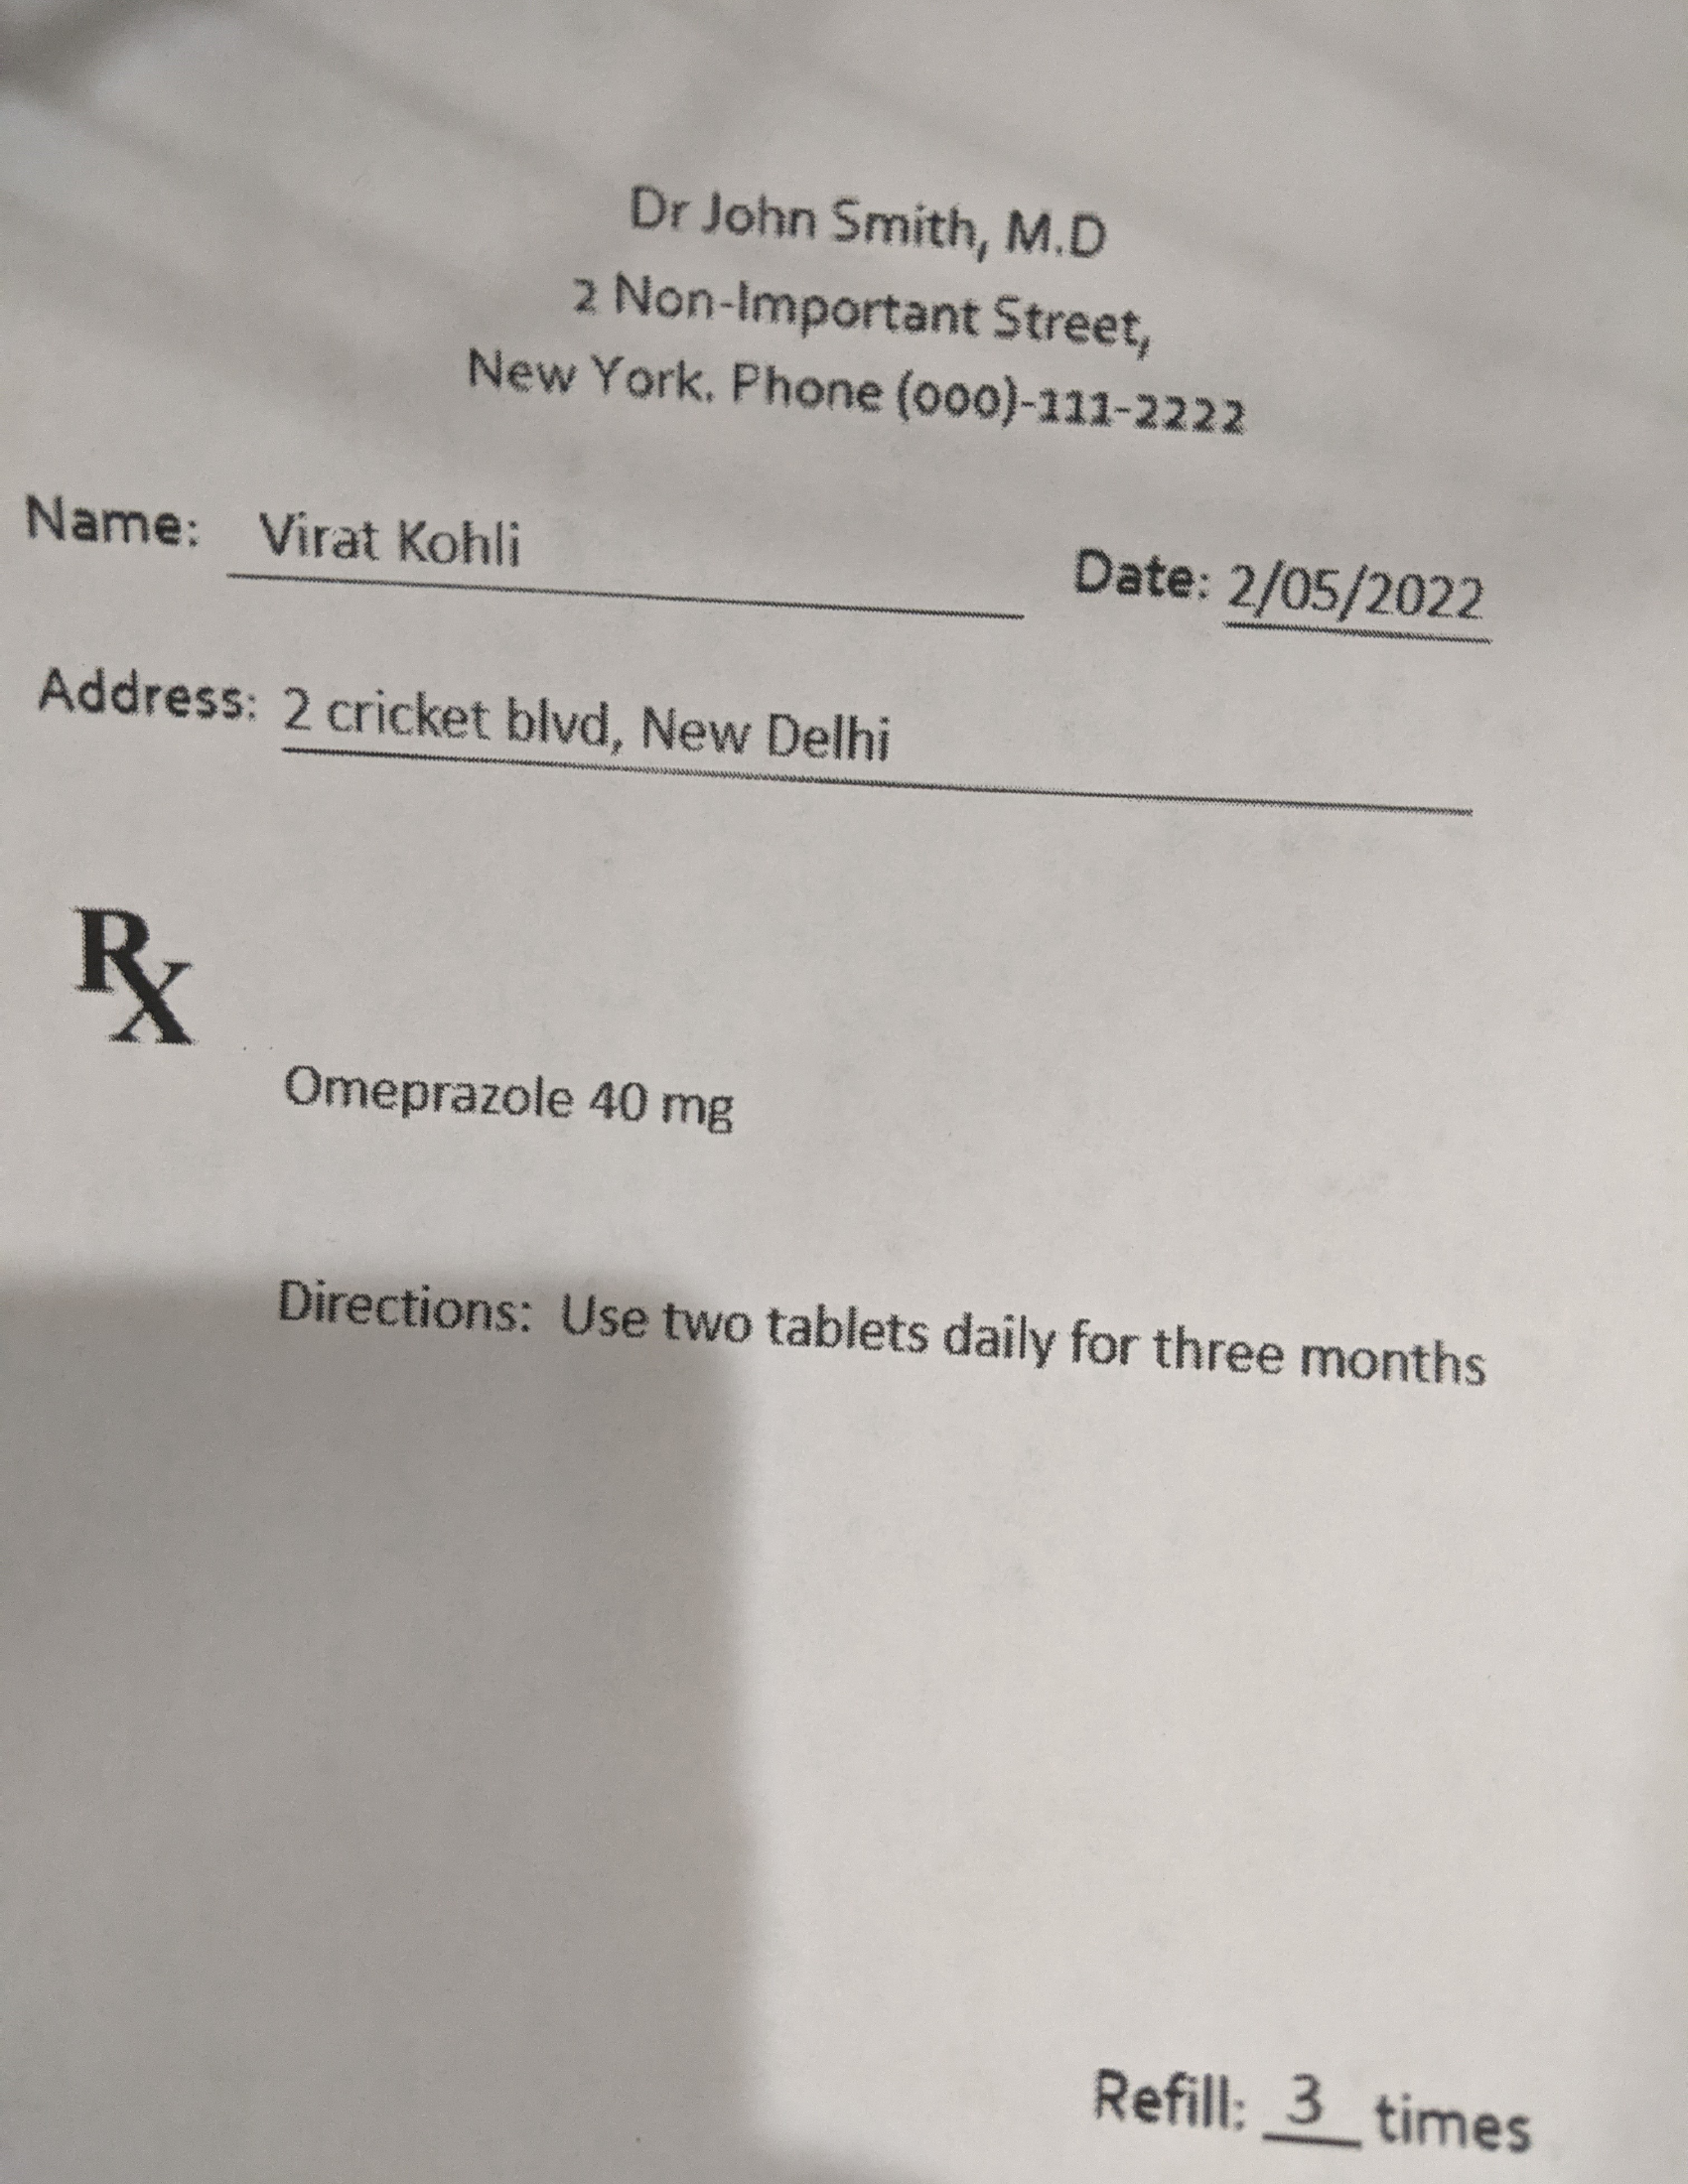

In [24]:
pages[0]

In [10]:
import pytesseract 

In [26]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(pages[0],lang='eng')
print(text)

 

Refill: 3 times

 



In [20]:
import numpy as np
import cv2
from PIL import Image

def preprocess_image(img):
    gray = cv2.cvtColor(np.array(img),cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray,None,fx=1.5,fy=1.5,interpolation=cv2.INTER_LINEAR)
    processed_image = cv2.adaptiveThreshold(
        resized,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        61,
        11
    )
    return processed_image

In [29]:
img = preprocess_image(pages[0])
Image.fromarray(img).show()

In [30]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(img,lang='eng')
print(text)

Dr John >mith, M.D

2 Non-Important street,
New York, Phone (900)-323- ~2222

Name:  Virat Kohli Date: 2/05/2022

 
   

Address: 2 cricket blvd, New Delhi

| Omeprazole 40 mg

Directions: Use two tablets daily for three months

Refill: 3 times



In [31]:
import re

In [36]:
pattern = 'Name:(.*)Date'

match = re.findall(pattern,text)
match

['  Virat Kohli ']

In [37]:
match[0].strip()

'Virat Kohli'

In [38]:
pattern = 'Address:(.*)\n'

match = re.findall(pattern,text)
match[0].strip()

'2 cricket blvd, New Delhi'

In [41]:
pattern = 'Address[^\n]*(.*)Directions'

match = re.findall(pattern,text,flags=re.DOTALL)
print(match[0].strip())

| Omeprazole 40 mg
